# Lab 10 Assignment

In [ ]:
import pandas as pd
import numpy as np

## 1. Merging DataFrames

Import video-activities.xlsx in a dataframe called `video_data`:

In [ ]:
video_data = pd.read_excel('video-activities.xlsx')
video_data.head()

,StudentId,Day,Action,VideoId,Count
0,10.0,4.0,play,3.0,47.0
1,1.0,4.0,forward,1.0,37.0
2,2.0,26.0,pause,3.0,3.0
3,3.0,18.0,backward,1.0,33.0
4,2.0,10.0,caption,2.0,48.0


Import the `video-module-match.xlsx` table into a dataframe called `video_modules`.

Then print the first 5 rows of `video_modules`.

This data indicates to which module of the course the videos belong to.

In [ ]:
video_modules = pd.read_excel('video-module-match.xlsx')
video_modules.head()

,VideoId,ModuleId
0,1,1
1,2,1
2,3,1
3,1,1
4,3,1


**TASK 1 [5 PTS]** Please drop duplicate values in `video_modules`

In [ ]:
video_modules = video_modules.drop_duplicates()
video_modules.head()

,VideoId,ModuleId
0,1,1
1,2,1
2,3,1
20,5,2
21,4,2


**TASK 2 [15 PTS]** Merge `video_data` with `video_modules`.

The join operation should return all records from `video_data`, and the matching records from `video_modules`.

The resulting dataframe of join should be stored into `video_data_comp`.



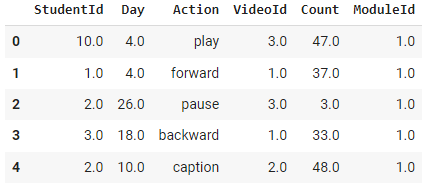

In [ ]:
video_data_comp = video_data.merge(
    video_modules,
    how="left",
    on="VideoId"
)
video_data_comp.head()

,StudentId,Day,Action,VideoId,Count,ModuleId
0,10.0,4.0,play,3.0,47.0,1.0
1,1.0,4.0,forward,1.0,37.0,1.0
2,2.0,26.0,pause,3.0,3.0,1.0
3,3.0,18.0,backward,1.0,33.0,1.0
4,2.0,10.0,caption,2.0,48.0,1.0


## 2. Pivoting Tables & Generating Features

**In the rest of the code, you should use `video_data_comp` as the data source.**

### 2.1. First Pivot Table

**TASK 3 [15 PTS]** Use the `pivot_table` function to make a table called `pivot1`. This table should display the average number of video actions for each student.

Each type of video action should be a separate column, and `StudentId` should be the row index. The values in the cells should be the average of the `Count` values.

The pivoted table should look like this (but with more rows): It shows, on average, how many times each student performed each video action.

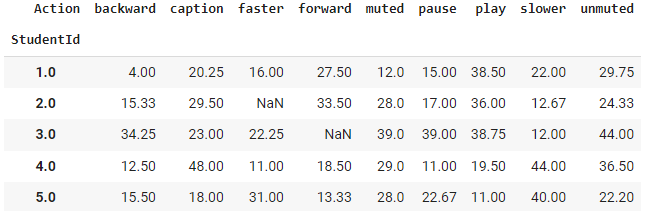

In [ ]:
pivot1 = pd.pivot_table(video_data_comp, index="StudentId", columns="Action", values="Count")
pivot1.head()

Action,backward,caption,faster,forward,muted,pause,play,slower,unmuted
StudentId,,,,,,,,,
1.0,4.000000,20.25,16.00,27.500000,12.0,15.000000,38.50,22.000000,29.750000
2.0,15.333333,29.50,NaN,33.500000,28.0,17.000000,36.00,12.666667,24.333333
3.0,34.250000,23.00,22.25,NaN,39.0,39.000000,38.75,12.000000,44.000000
4.0,12.500000,48.00,11.00,18.500000,29.0,11.000000,19.50,44.000000,36.500000
5.0,15.500000,18.00,31.00,13.333333,28.0,22.666667,11.00,40.000000,22.200000


**TASK 4 [5 PTS]** Using `pivot1`, print the total number for each action and sort the results to obtain the following output.

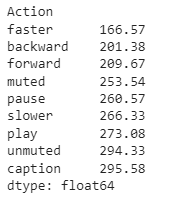

In [ ]:
pivot1.sum().sort_values()

,0
Action,
faster,166.566667
backward,201.383333
forward,209.666667
muted,253.541667
pause,260.566667
slower,266.333333
play,273.083333
unmuted,294.333333
caption,295.583333


**TASK 5 [15 PTS]** Based on `pivot1`, generate a new column (i.e., variable), called `EngagedAll`, which should be `1` or `true` if students engaged in all types of video actions, and `0` or `false` otherwise.

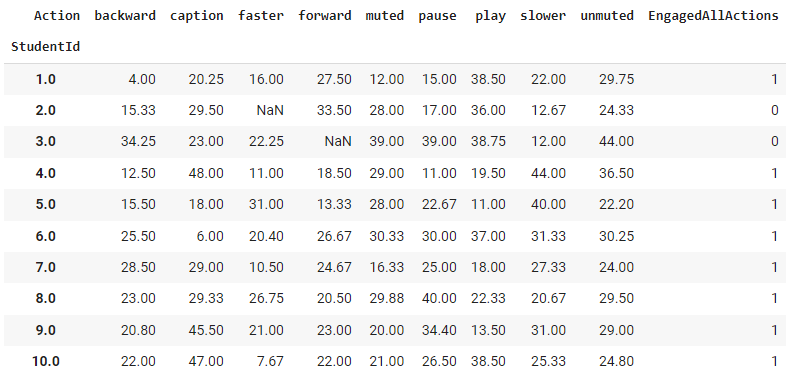

In [ ]:
pivot1["EngagedAllActions"] = pivot1.notna().all(axis=1).astype(int)
pivot1

Action,backward,caption,faster,forward,muted,pause,play,slower,unmuted,EngagedAllActions
StudentId,,,,,,,,,,
1.0,4.000000,20.250000,16.000000,27.500000,12.000000,15.000000,38.500000,22.000000,29.750000,1
2.0,15.333333,29.500000,NaN,33.500000,28.000000,17.000000,36.000000,12.666667,24.333333,0
3.0,34.250000,23.000000,22.250000,NaN,39.000000,39.000000,38.750000,12.000000,44.000000,0
4.0,12.500000,48.000000,11.000000,18.500000,29.000000,11.000000,19.500000,44.000000,36.500000,1
5.0,15.500000,18.000000,31.000000,13.333333,28.000000,22.666667,11.000000,40.000000,22.200000,1
6.0,25.500000,6.000000,20.400000,26.666667,30.333333,30.000000,37.000000,31.333333,30.250000,1
7.0,28.500000,29.000000,10.500000,24.666667,16.333333,25.000000,18.000000,27.333333,24.000000,1
8.0,23.000000,29.333333,26.750000,20.500000,29.875000,40.000000,22.333333,20.666667,29.500000,1
9.0,20.800000,45.500000,21.000000,23.000000,20.000000,34.400000,13.500000,31.000000,29.000000,1


### 2.2. Second Pivot Table

**TASK 6 [10 PTS]** You should use `pivot_table` function to create a table (named `pivot2`) that shows the average number of video actions ***per each module*** for each student.

That is each distinct module (where the interacted videos belong to) should be a separate column whereas StudentId should be the row index. The values in the cells should be the average of the Count values.

Your `pivot2` table should look like the following image (where only two rows are displayed). The table shows how many times in average each student interacted with a video in each moudle.

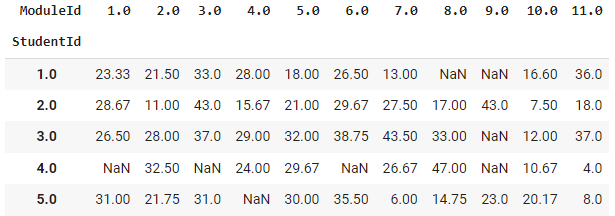

In [ ]:
pivot2 = pd.pivot_table(
    video_data_comp,
    index="StudentId",
    columns="ModuleId",
    values="Count",
    aggfunc="mean"
)

pivot2.head()

ModuleId,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0
StudentId,,,,,,,,,,,
1.0,23.333333,21.50,33.0,28.000000,18.000000,26.500000,13.000000,NaN,NaN,16.600000,36.0
2.0,28.666667,11.00,43.0,15.666667,21.000000,29.666667,27.500000,17.00,43.0,7.500000,18.0
3.0,26.500000,28.00,37.0,29.000000,32.000000,38.750000,43.500000,33.00,NaN,12.000000,37.0
4.0,NaN,32.50,NaN,24.000000,29.666667,NaN,26.666667,47.00,NaN,10.666667,4.0
5.0,31.000000,21.75,31.0,NaN,30.000000,35.500000,6.000000,14.75,23.0,20.166667,8.0


**TASK 7 [10 PTS]** Find the average number of modules interacted by all students, and save this value into a variable called `avgModule`. The output should be 9.5.


In [ ]:
avgModule = pivot2.notna().sum(axis=1).mean()
avgModule

np.float64(9.5)

9.5

**TASK 8 [15 PTS]** Based on `pivot2`, generate a new column (i.e., variable), called `ModuleAboveAverage`, which should be `1` or `true` if the number of modules students engaged in is higher than `avgModule`, and `0` or `false` otherwise.

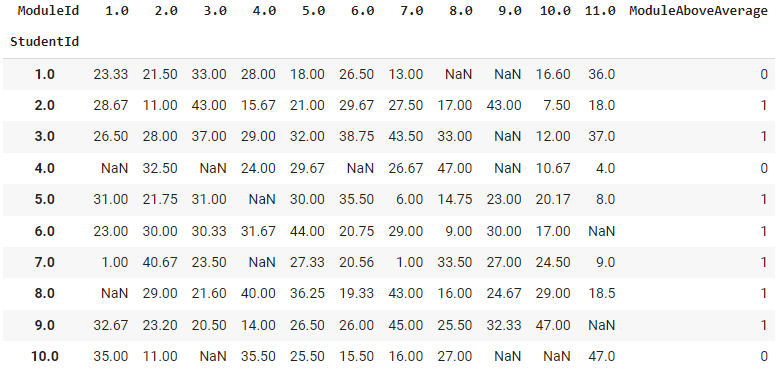

In [ ]:
pivot2["ModuleAboveAverage"] = (pivot2.notna().sum(axis=1) > avgModule).astype(int)
pivot2

ModuleId,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,ModuleAboveAverage
StudentId,,,,,,,,,,,,
1.0,23.333333,21.500000,33.000000,28.000000,18.000000,26.500000,13.000000,NaN,NaN,16.600000,36.0,1
2.0,28.666667,11.000000,43.000000,15.666667,21.000000,29.666667,27.500000,17.00,43.000000,7.500000,18.0,1
3.0,26.500000,28.000000,37.000000,29.000000,32.000000,38.750000,43.500000,33.00,NaN,12.000000,37.0,1
4.0,NaN,32.500000,NaN,24.000000,29.666667,NaN,26.666667,47.00,NaN,10.666667,4.0,0
5.0,31.000000,21.750000,31.000000,NaN,30.000000,35.500000,6.000000,14.75,23.000000,20.166667,8.0,1
6.0,23.000000,30.000000,30.333333,31.666667,44.000000,20.750000,29.000000,9.00,30.000000,17.000000,NaN,1
7.0,1.000000,40.666667,23.500000,NaN,27.333333,20.555556,1.000000,33.50,27.000000,24.500000,9.0,1
8.0,NaN,29.000000,21.600000,40.000000,36.250000,19.333333,43.000000,16.00,24.666667,29.000000,18.5,1
9.0,32.666667,23.200000,20.500000,14.000000,26.500000,26.000000,45.000000,25.50,32.333333,47.000000,NaN,1


**TASK 9 [10 PTS]** Create a new dataframe, called `finalData` that should contain the new columns generated.

`finalData` should look like the following image:

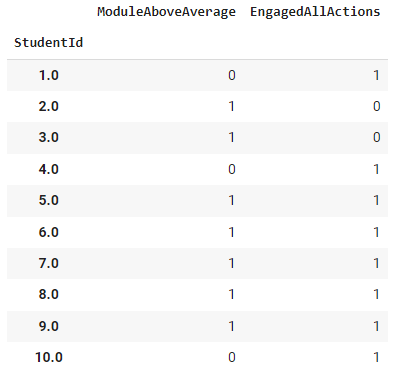

In [ ]:
finalData = pivot2[['ModuleAboveAverage']].join(pivot1[['EngagedAllActions']])
finalData

,ModuleAboveAverage,EngagedAllActions
StudentId,,
1.0,1,1
2.0,1,0
3.0,1,0
4.0,0,1
5.0,1,1
6.0,1,1
7.0,1,1
8.0,1,1
9.0,1,1
